# Práctica 1: Aprendizaje automático

__Fecha de entrega: 9 de marzo de 2022__

El objetivo de esta práctica es aplicar los distintos algoritmos de aprendizaje automático disponibles en la scikit-learn [sklearn](https://scikit-learn.org/stable/) sobre varios conjuntos de datos y aprender a interpretar los resultados obtenidos. La práctica consta de 3 notebooks que se entregarán simultáneamente en la tarea de entrega habilitada en el Campus  Virtual.

Lo más importante en esta práctica no es el código Python, sino el análisis de los datos y modelos que construyas y las explicaciones razonadas de cada una de las decisiones que tomes. __No se valorarán trozos de código o gráficas sin ningún tipo de contexto o explicación__.

Finalmente, recuerda establecer el parámetro `random_state` en todas las funciones que tomen decisiones aleatorias para que los resultados sean reproducibles (los resultados no varíen entre ejecuciones).

## Apartado 3: Regresión

__Número de grupo: XX__

__Nombres de los estudiantes: XXX y XXX__

En este notebook trabajaremos con un conjunto de datos tomado del repositorio de la Universidad de California Irvine. En concreto, se trata de un conjunto de datos sobre distintos vinos del norte de Portugal (vinho verde)  que puedes encontrar [aquí](https://archive.ics.uci.edu/ml/datasets/wine+quality). 

El objetivo es modelar la calidad del vino (con un valor de 0 a 10) en base a variables que reflejan sus propiedades físicas y químicas. En concreto, las propiedades son las siguientes:
- fixed acidity
- volatile acidity
- citric acid
- residual sugar
- chlorides
- free sulfur dioxide
- total sulfur dioxide
- density
- pH
- sulphates
- alcohol 

De cara a la memoria que vas a realizar puedes investigar sobre estas propiedades para explicar mejor qué miden y cómo afectan al vino. 

La calidad del vino es una variable que toma valores entre 0 y 10. 

Para modelar la relación entre la calidad del vino y sus propiedades usaremos una red neuronal. 

### 1) Descripción de los datos

Carga el fichero de datos `calidad_vinos.csv` en un dataframe. 

Describe el conjunto de datos e identifica aquella variable que tiene unos valores extremos más acusados con respecto a la media, y aquella que está más concentrada en torno a la media. Reflexiona sobre la posible influencia de estas variables a la hora de entrenar el perceptrón multicapa.

Estudia la distribución de la calidad del vino en el conjunto de datos.

Primero de todo, importamos el fichero en un dataframe e inicializamos la variable de aleatoriedad a 333.

In [41]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [42]:
RANDOM_STATE=333

In [43]:
df = pd.read_csv('calidad_vinos.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
df_info = df.describe().transpose()
df_info['coeficiente_variacion'] = df_info['std']/df_info['mean']
df_info

,count,mean,std,min,25%,50%,75%,max,coeficiente_variacion
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000,0.209276
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000,0.339244
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000,0.718888
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000,0.555351
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100,0.538095
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000,0.658911
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000,0.707917
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369,0.001893
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000,0.046627
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000,0.257551


### Primer análisis de datos y dispersión de las variables

Para ver la variabilidad de las variables nos fijamos en la media, en la desviación, los picos de máximos y mínimos, así como el coeficiente de variación añadido, que refleja la variación relativa de la desviación típica respecto a la media y es independiente de las diferentes escalas en las que se mueven las variables. Además, esta medida es lógica cuando trabajamos con variables estrictamente positivas, cosa que ocurre en este conjunto de datos.

En este caso se ve que la variable **'density'** tiene un coeficiente de variación realmente bajo, es decir, sus valores son realmente uniformes alrededor de su media. Además tanto máximo como mínimo se quedan realmente cerca de la misma.

La variable **'pH'** sigue una idea similar. Su variación respecto a la media es baja, y el mínimo y máximo no se alejan demasiado de la misma, al fin y al cabo tiene un coeficiente de variación de 0.04. Los cuartiles también se quedan cerca de la misma.

Por otro lado, tenemos las variables de **'total sulfur dioxide'** con 0.707917 de coeficiente de variación, un valor realmente grande, y se puede observar el origen de dicho coeficiente rápidamente, ya que tenemos una media de 46.467792 y una desviación típica de 32.89, muy cercana a la propia media que refleja poca acumulación. Además tenemos una diferencia de 283 entre el mínimo y el máximo, un rango bastante amplio. 

Pero aún más es el coeficiente de la variable **'citric acid'**, que es de 0.7188 pues, al igual que con la variable anterior, tenemos una dispersión relativa alta de los valores. La desviación es de 0.194801, que podría parecer un valor pequeño, pero comparándolo de forma relativa con la media, 0.270976, vemos que es considerable. El máximo y mínimo difieren en 1 punto, que es prácticamente cinco veces el valor medio, un rango de valores muy amplio también. 

En resumen, las dos variables más centradas son **'density'** y **'pH'**, y las más alejadas son **'total sulfur dioxide'** y **'citric acid'**, siempre teniendo en cuenta lo centradas que están relativamente a la media y no de forma absoluta.

Esto nos puede decir que esas dos primeras variables centradas tienen poca información real sobre los datos, serán probablemente obviables y ayudaría a mejorar la velocidad convergencia del MLP. Sin embargo, no eliminarlas no evitará que este deje de funcionar, sino que el propio sistema se dará cuenta de la irrelevancia de las mismas, otorgándoles un peso nulo.

Respecto a las variables dispersas, podría ser que sean relevantes o no, pero de primeras parece que tendrían información relevante para clasificar, pues varían entre los distintos ejemplos. Vamos a agrupar por calidad, a ver qué podemos extraer de estas y otras variables.


In [5]:
df_info2 = df.groupby(['quality']).describe()
df_info2

fixed acidity                                                     \
                count      mean       std  min   25%   50%     75%   max   
quality                                                                    
3                10.0  8.360000  1.770875  6.7  7.15  7.50   9.875  11.6   
4                53.0  7.779245  1.626624  4.6  6.80  7.50   8.400  12.5   
5               681.0  8.167254  1.563988  5.0  7.10  7.80   8.900  15.9   
6               638.0  8.347179  1.797849  4.7  7.00  7.90   9.400  14.3   
7               199.0  8.872362  1.992483  4.9  7.40  8.80  10.100  15.6   
8                18.0  8.566667  2.119656  5.0  7.25  8.25  10.225  12.6   

        volatile acidity            ... sulphates       alcohol             \
                   count      mean  ...       75%   max   count       mean   
quality                             ...                                      
3                   10.0  0.884500  ...     0.615  0.86    10.0   9.955000   
4                   53.0  0.693962  ...     0.600  2.00    53.0  10.265094   
5                  681.0  0.577041  ...     0.660  1.98   681.0   9.899706   
6                  638.0  0.497484  ...     0.750  1.95   638.0  10.629519   
7                  199.0  0.403920  ...     0.830  1.36   199.0  11.465913   
8                   18.0  0.423333  ...     0.820  1.10    18.0  12.094444   

                                                      
              std  min     25%     50%     75%   max  
quality                                               
3        0.818009  8.4   9.725   9.925  10.575  11.0  
4        0.934776  9.0   9.600  10.000  11.000  13.1  
5        0.736521  8.5   9.400   9.700  10.200  14.9  
6        1.049639  8.4   9.800  10.500  11.300  14.0  
7        0.961933  9.2  10.800  11.500  12.100  14.0  
8        1.224011  9.8  11.325  12.150  12.875  14.0  

[6 rows x 88 columns]

In [6]:

for row in df_info2.index:
    for col in df_info2.columns.levels[0]:
        df_info2.loc[row,(col, 'coeficiente variacion')] = df_info2.loc[row, (col,'std')]/df_info2.loc[row, (col,'mean')]
df_info2.transpose().xs('coeficiente variacion', level=1).transpose()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,0.211827,0.374512,1.465869,0.531915,0.540741,0.887625,0.675859,0.002007,0.042393,0.214070,0.082171
4,0.209098,0.317179,1.154346,0.664147,0.840234,0.735960,0.761020,0.001581,0.053657,0.401383,0.091064
5,0.191495,0.285597,0.738667,0.537695,0.579145,0.645051,0.654584,0.001593,0.045574,0.275476,0.074398
6,0.215384,0.323552,0.712531,0.581939,0.465691,0.632712,0.612633,0.002007,0.046411,0.234922,0.098748
7,0.224572,0.359538,0.518243,0.504120,0.384597,0.724464,0.947776,0.002184,0.045613,0.182985,0.083895
8,0.247431,0.342316,0.510151,0.502386,0.170622,0.840172,0.760462,0.002390,0.061410,0.150277,0.101204


<AxesSubplot:ylabel='quality'>

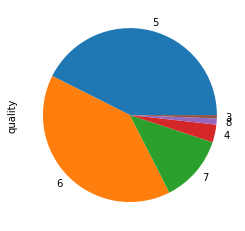

In [7]:
df['quality'].value_counts().plot.pie()

### Estudio con clases agrupadas

Estos dos últimos dataframes nos dan información sobre las clases, pero ahora de forma agrupada. El primero simplemente muestra los datos agrupados por clases. El segundo calcula los coeficientes de variación igual que hicimos al principio. Así podemos ver que, pese a tener algunas clases infrarepresentadas (pocos sujetos de las clases 3, 8 o 4), el estudio de variables dispersas una vez agrupamos por clases es similar al de todos los elementos juntos. 

Se observa que las variables "citric acid" y "total sulfur dioxide" siguen dando en promedio la mayor tasa de variación (pese a no ser cierto en alguna clase concreta, donde también entraría en juego 'free sulfur dioxide, ocurre de forma general)

De igual forma, los valores de menos tasa siguen siendo, además de manera uniforme, los asociados a las variables 'density' y 'pH'.

Por último, vemos en el diagrama de tarta que las clases están desbalanceadas. Lo suyo sería, pues, trabajar con la librería de clases no balanceadas o realizar un estratificado de las mismas (este problema del conjunto de datos lo comentaremos al final de la práctica)

Ahora que ya hemos analizado los datos, veamos que esta información cuadra con lo observable en los diagramas de densidad.

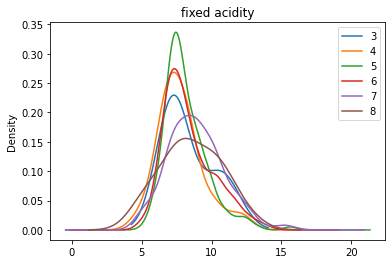

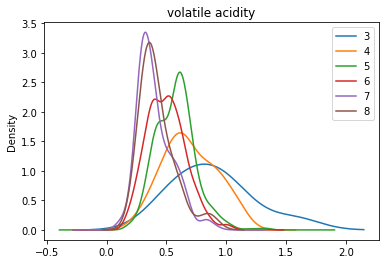

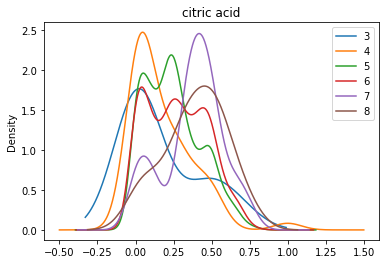

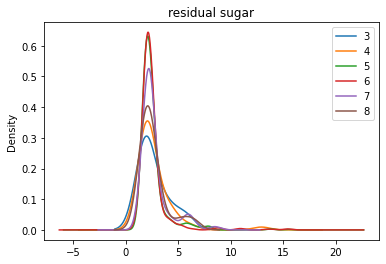

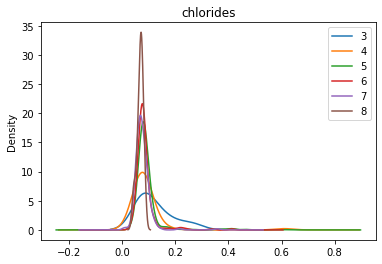

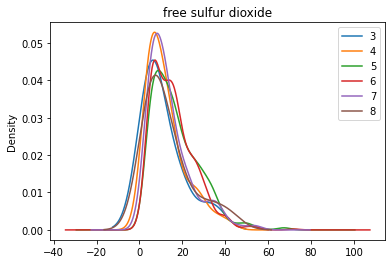

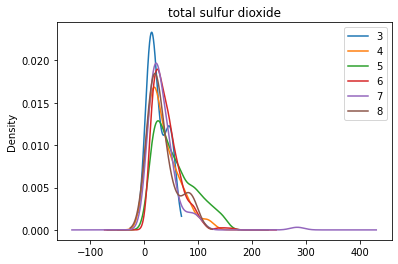

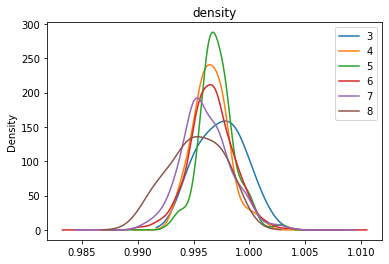

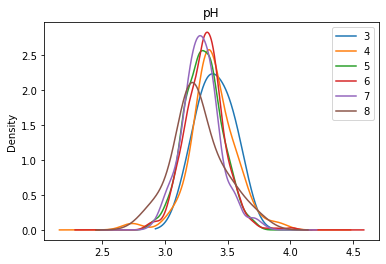

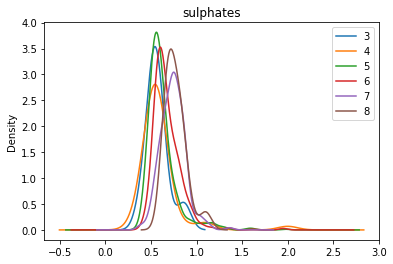

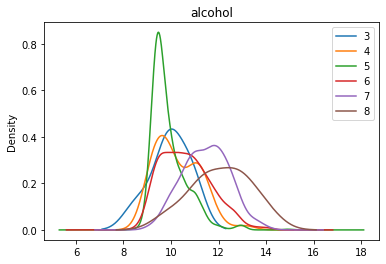

In [8]:
for col in df.columns:
    if col!='quality':
        plt.figure()
        df.groupby(["quality"])[col].plot(kind="density", title=col, legend='true')


Para observar si un diagrama de densidad se comporta de acuerdo a una distribución normal (reparto uniforme de datos), y, por tanto, los datos están bien repartidos, tenemos que buscar gráficas donde el grueso de los datos esté en un punto central, es decir, haya una sola 'colina', así como no sea demasiado ancho el gráfico o demasiado plano con respecto a la escala de los mismos.

Usando esta referencia, es fácil ver en los diagramas anteriores que la variable **'citric acid'** nos da una variabilidad enorme de los datos respecto a la media, pues el diagrama de densidad está compuesto en las diferentes clases por múltiples colinas que suben y bajan.Con respecto a la separación de las clases, sí parece que es posible diferenciar mediante esta variables un poco el resultado final, pues las clases 3 y 4 se quedan con un valor más pequeño (hacia la izquierda) mientras que las clases 7 y 8 se posicionan en valores más altos (en torno a la derecha)

En el caso de **'total sulfur dioxide'** parece estar más ajustado, pero basta ver que el eje inferior es más grande que la del resto, es decir, tenemos valores más dispersos y por tanto la parte relevante de la gráfica ha quedado comprimida. 

Por otro lado, las variables más agrupadas eran **'density'** y **'pH'**. En sus respectivas gráficas de densidad se aprecia un rango de movimiento muy pequeño en la parte inferior, que refleja esa poca variabilidad y agrupación de los valores en dichas variables. 'density' se mueve entre 0.985 y 1.010 y 'pH' entre 2.5 y 4.5, pero con valores de cada clase uniformes también.

A la hora de separar por clases, aparte del ya comentado caso de **'citric acid'**, parece que la variable alcohol también organiza de forma decente algunas clases, quedando 3, 4, 5 y 6 con menores más bajos, mientras que 7 y 8 suben a valores mayores. Esto es un indicador de que podría estar correlacionada con la variable objetivo.

Otra variable que parece separar, este caso de forma inversa, es **'volatile acidity'**. En este caso tenemos una aparente correlación negativa (que luego comprobaremos si es cierta con el análisis de la bivarianza), en la que valores más pequeños de la misma reflejan clases con mejor calidad.

También en el caso de la variable **'sulphates'** obtenemos una aparente separación entre los valores de las clases 7 y 8, que obtendrán mayor cantidad de sulfitos que el resto de clases.



### 2) Selección de variables

Calcula los coeficientes de correlación de Pearson entre la variable de salida y el resto de variables. Crea un nuevo dataframe que contenga la calidad del vino y las variables que estén más correlacionadas con esa variable (estableciendo para ello un valor umbral que consideres adecuado).

In [9]:
# buscamos las variables más correladas con la variable a predecir (target)
correl=df.corr()
correl['quality']

fixed acidity           0.124052
volatile acidity       -0.390558
citric acid             0.226373
residual sugar          0.013732
chlorides              -0.128907
free sulfur dioxide    -0.050656
total sulfur dioxide   -0.185100
density                -0.174919
pH                     -0.057731
sulphates               0.251397
alcohol                 0.476166
quality                 1.000000
Name: quality, dtype: float64

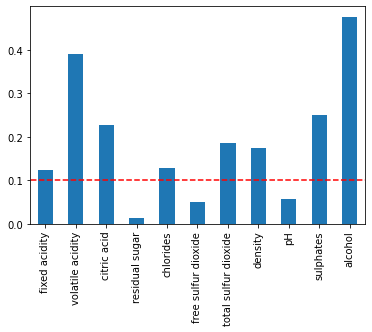

In [10]:
ax = abs(correl['quality'].drop('quality')).plot.bar()
ax.hlines(y = 0.1, xmin = -1, xmax = 100, linestyle = 'dashed', color = 'red')

Veamos la relación entre algunas de las variables y la calidad objetivo.

El **'residual sugar'** parece ser irrelevante de cara a la calidad del vino. Esto tiene sentido respecto a la realidad, pues hay tipos de vino con distinta tasa de azúcar independientemente de su calidad.

De igual forma, el **'free sulfur dioxide'** tampoco está relacionado con la calidad. Según lo investigado, el SO2 sobrante y libre ha de estar en unas tasas para que el vino se encuentre en buenas condiciones, pero una vez que se encuentra en esos rangos no es relevante de cara a si un vino es mejor o peor, aparentemente.

La variable **'pH'** tampoco da una correlación considerable. El pH define más bien distintos tipos de vinos, más bajo en el caso de los blancos y más alto en los tintos. Sin embargo, no influye como tal en la calidad pues hay vinos de alta calidad y baja calidad de diferentes tipos.

Por otro lado, el **'alcohol'** tiene correlación aceptable. Según https://eu.tennessean.com/story/life/food/2015/04/17/alcohol-content-affect-wine/25779589/, la tasa de alcohol alta, aunque no excesivamente, proviene de unas uvas más dulces y que en los últimos años han obtenido más atención. Por tanto, parece tener sentido. Además, es raro que haya vinos sin alcohol de alta calidad.

Al igual que el alcohol, la variable **'volatile acidity'** tiene una tasa de correlación negativa pero suficientemente alta como para darle sentido. En este caso, según https://www.awri.com.au/wp-content/uploads/2018/03/s1982.pdf,  esta variable es interesante reducirla al mínimo y, de hecho, algunos vinos que no se lo pueden permitir añaden azúcar al mismo para esconder su presencia. Por tanto, tiene sentido esta correlación  negativa.

La correlación con respecto de la variable **'sulphates'** es aceptable. Hace referencia a productos que aparecen en el vino y preservan su calidad. Si bien son necesarios para la conservación del mismo, en altas cantidades pueden ser negativos y no parece haber un motivo directo para dicha correlación (tal vez sea una correlación indirecta asociada a otras variables).

En el caso de la variable **'chlorides'**, tenemos una correlación negativa. Esto tiene sentido, pues es un ión que afecta de forma negativa y da un sabor desagradable al vino (investigado en https://www.scielo.br/j/cta/a/HQsrPrPMNZYgRzSKtrjHyHh/?format=pdf&lang=en), sobre todo en el caso de tinto. Por eso no afecta a todos los vinos y no está tan relacionado.

La variable **'density'** nos dará una correlación negativa similar en absoluto a la de **'fixed acidity'** solo que esta en positivo. No parece haber información pública que sustente esta relación entre ambas variables (la densidad del vino y los ácidos del mismo ya sean volátiles o no) y la calidad del mismo, pero es un valor bajo de la misma.

Finalmente, **'citric acid'** tiene una correlación ligeramente considerable y positiva. Es un compuesto que se añade a veces para darle un sabor fresco y mejorar la preservación del vino (https://wineserver.ucdavis.edu/industry-info/enology/methods-and-techniques/common-chemical-reagents/citric-acid) por lo que parece que tenerlo en una cantidad no excesiva tendrá sentido.

Ahora nos quedaremos con las variables de las anteriores cuya correlación, ya sea negativa o positiva, sea mayor en valor absoluto.


Hemos decido escoger aquellas con un coeficiente superior a 0.1.


In [11]:
correl[abs(correl['quality']) > 0.1]['quality'].drop('quality')


fixed acidity           0.124052
volatile acidity       -0.390558
citric acid             0.226373
chlorides              -0.128907
total sulfur dioxide   -0.185100
density                -0.174919
sulphates               0.251397
alcohol                 0.476166
Name: quality, dtype: float64

Estableciendo un umbral de 0.1 obtengo ocho variables.

Estas variables son 'fixed acidity', 'volatile acidity', 'citric acid', 'chlorides', 'total sulfur dioxide', 'density', 'sulphates' y 'alcohol'; en ese orden. 

Pese a que 0.1 no es un valor muy alto de correlación, debido a que los datos ofrecidos no están suficientemente relacionados necesitamos un rango bajo para obtener suficientes variables significativas. Sin embargo, creemos que un valor menor de 0.1 es irrelevante de cara a la correlación y daría demasiadas variables sin aporte, que ya hemos comentado no es problemático para el sistema porque aprende igual, pero de forma más lento.
Nos parece suficientemente razonable, pues, trabajar con estas ocho y no más. 

Construimos a continuación el dataframe solo con esas variables:

In [12]:
df2 = df.loc[:, ['fixed acidity', 'volatile acidity', 'citric acid', 'chlorides', 'total sulfur dioxide', 'density', 'sulphates', 'alcohol', 'quality']]
df2

,fixed acidity,volatile acidity,citric acid,chlorides,total sulfur dioxide,density,sulphates,alcohol,quality
0,7.4,0.700,0.00,0.076,34.0,0.99780,0.56,9.4,5
1,7.8,0.880,0.00,0.098,67.0,0.99680,0.68,9.8,5
2,7.8,0.760,0.04,0.092,54.0,0.99700,0.65,9.8,5
3,11.2,0.280,0.56,0.075,60.0,0.99800,0.58,9.8,6
4,7.4,0.700,0.00,0.076,34.0,0.99780,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,0.090,44.0,0.99490,0.58,10.5,5
1595,5.9,0.550,0.10,0.062,51.0,0.99512,0.76,11.2,6
1596,6.3,0.510,0.13,0.076,40.0,0.99574,0.75,11.0,6
1597,5.9,0.645,0.12,0.075,44.0,0.99547,0.71,10.2,5


### 3) Normalización

Decide si debes o no normalizar los datos de entrada y/o de salida. En caso afirmativo elige razonadamente entre escalarlos o estandarizarlos.


Primero de todo,nos quedamos solo con las variables estipuladas anteriormente como aquellas con un coeficiente de correlación suficientemente aceptable y eliminamos las que no consideramos tengan una aparente relación con la calidad.

MLP es un sistema que es capaz de funcionar con datos sin escalar o estandarizar. Sin embargo, si queremos que el tiempo de entrenamiento sea menor y evitar los mínimos locales, lo mejor que podemos hacer es estandarizarlos. Además, no va a ser demasiado costoso pues estamos ante ocho variables, una cantidad baja de las mismas.

In [13]:
#Obtenemos las variables desde el dataframe
np_target = df2.loc[:,['quality']].to_numpy()
np_input = df2.drop(columns='quality').to_numpy()
# Transformamos las variables de entrada
scaler_x = StandardScaler()

scaler_x.fit(np_input)
input_scaled=scaler_x.transform(np_input)

# Y también transformamos la variable de salida
scaler_y = StandardScaler()
scaler_y.fit(np_target.reshape(-1, 1)) # Como es una sola variable es necesario ponerlo en modo columna
target_scaled=scaler_y.transform(np_target.reshape(-1, 1))

### 4) Entrenamiento y selección

Crea dos redes neuronales de tipo Perceptrón Multicapa:
- La primera con una capa oculta de 250 neuronas
- La segunda con varias capas ocultas entre las que debes distribuir 250 neuronas, como te parezca

Asegúrate de que no salen warnings durante el entrenamiento indicando que no se ha alcanzado la convergencia durante el entrenamiento (para arreglarlo basta con poner un número de max_iter suficientemente grande).

En la configuración del perceptrón debes usar validación cruzada y explorar varios valores para el parámetro `alpha` que controla el coeficiente de regularización L2.

Para elegir el valor adecuado de dicho coeficiente pinta la curva de aprendizaje para cada perceptrón. En la curva debes pintar una línea que represente el error medio de las distintas particiones de validación y un área sombreada que represente la desviación típica. 

Una vez tengas la curva de aprendizaje: 
  - Identifica las diferencias de comportamiento entre ambos perceptrones, razona o especula sobre por qué se dan. ¿Hay alguno que domine al otro? ¿Es el comportamiento de uno más volátil que el del otro?
  - Determina de manera razonada con qué perceptrón te quedas y el valor óptimo del parámetro de regularización.


### Primera red neuronal: 250 nodos en 1 capa oculta

Procedemos a realizar validacion cruzada con diferentes valores de parámetro alpha que controla el coeficiente de regulación L2. Después veremos como queda para cada parámetro la tasa de puntuaciones con sus respectivas desviaciones para así encontrar la influencia del parámetro así como cual es el más apropiado para la siguiente configuración de una capa oculta de 250 neuronas.

In [14]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import numpy as np

cv_scores_mean=[]
cv_scores_std=[]

# Entrenar y validar distintas configuraciones
regul_param_range = 10.0 ** -np.arange(1, 7) # [0.1, 0.01, ..., 0.000001]
for regul_param in regul_param_range:
    # Aumentamos el parámetro max_iter a 1000 para asegurar que converge
    mlp=MLPRegressor(hidden_layer_sizes=(250), activation='relu', solver='adam', alpha=regul_param, batch_size=100, 
             learning_rate='constant', learning_rate_init=0.001,max_iter=10000, random_state=RANDOM_STATE, )

   
    
    # El error es neg_mean_squared_error el MSE en negativo!! Más pequeño peor.

    scores = cross_val_score(mlp, np_input , np_target.ravel(), cv=5, scoring='neg_mean_squared_error')
    
    cv_scores_mean.append(scores.mean())
    cv_scores_std.append(scores.std())

cv_scores_mean, cv_scores_std


([-0.45033640232327876,
  -0.45112560548140684,
  -0.44817443097373244,
  -0.446063979793374,
  -0.44923241210106263,
  -0.4507876516150785],
 [0.0208052157947158,
  0.03137583398243864,
  0.032927608413952765,
  0.03639305619446541,
  0.030526926086432007,
  0.024726602125109985])

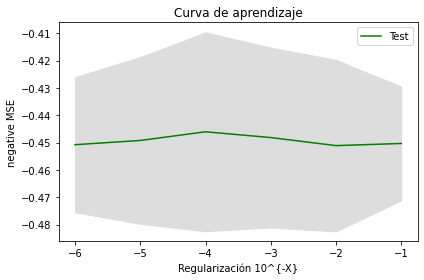

In [15]:
import matplotlib.pyplot as plt

# Dibujamos la línea de la exactitud media en las partes de test
plt.plot(np.log10(regul_param_range), cv_scores_mean, color="g", label="Test")

# Dibujamos la banda de la desviación típica
lower_limit = np.array(cv_scores_mean) - np.array(cv_scores_std)
upper_limit = np.array(cv_scores_mean) + np.array(cv_scores_std)
plt.fill_between(np.log10(regul_param_range), lower_limit, upper_limit, color="#DDDDDD")

# Creamos el gráfico
plt.title("Curva de aprendizaje")
plt.xlabel("Regularización 10^{-X}"), plt.ylabel("negative MSE"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

#### Análisis de los valores del parámetro para la red neuronal de 250 en la capa oculta 

Vemos que los valores del parámetro regularización se mantienen de forma estable. Además, según la gráfica, parece que el valor con que funcionará mejor, obtendremos una NMSE más cercana a 0, será con $\alpha=10^{-4}$.

Ahora hagamos las mismas comprobaciones con el caso de tener las 250 neuronas repartidas de otra forma, esta vez en capas ocultas de valores 125 y 125.

### Segunda red neuronal: 250 nodos repartidos en dos capas ocultas de 125 y 125 nodos.

In [16]:
cv_scores_mean=[]
cv_scores_std=[]


regul_param_range = 10.0 ** -np.arange(1, 7) # [0.1, 0.01, ..., 0.0000001]
for regul_param in regul_param_range:
    mlp=MLPRegressor(hidden_layer_sizes=(125,125), activation='relu', solver='adam', alpha=regul_param, batch_size=100, 
             learning_rate='constant', learning_rate_init=0.001, max_iter=1000, random_state=RANDOM_STATE, )
    
    scores = cross_val_score(mlp, np_input , np_target.ravel(), cv=5, scoring='neg_mean_squared_error')
    
    cv_scores_mean.append(scores.mean())
    cv_scores_std.append(scores.std())

cv_scores_mean, cv_scores_std

([-0.4727797330922755,
  -0.4743734258309263,
  -0.4604827355943715,
  -0.49428833470486666,
  -0.4716829470222903,
  -0.47374098412756177],
 [0.03565020533350652,
  0.058462500707368005,
  0.027240985142220096,
  0.08053833731461686,
  0.04252131085263483,
  0.04838919747882288])

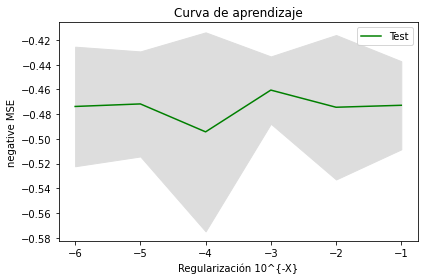

In [17]:
import matplotlib.pyplot as plt

# Dibujamos la línea de la exactitud media en las partes de test
plt.plot(np.log10(regul_param_range), cv_scores_mean, color="g", label="Test")

# Dibujamos la banda de la desviación típica
lower_limit = np.array(cv_scores_mean) - np.array(cv_scores_std)
upper_limit = np.array(cv_scores_mean) + np.array(cv_scores_std)
plt.fill_between(np.log10(regul_param_range), lower_limit, upper_limit, color="#DDDDDD")

# Creamos el gráfico
plt.title("Curva de aprendizaje")
plt.xlabel("Regularización 10^{-X}"), plt.ylabel("negative MSE"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

#### Análisis de los valores del parámetro para la segunda red neuronal: 250 nodos repartidos en dos capas ocultas de 125 y 125 nodos.


En este caso nos sale un valor del parámetro mucho más irregular, que afecta más al valor de la NMSE y, por tanto, más relevante aparentemente para el entrenamiento.Entre el rango de valores estudiados, el punto mejor se alcanza con $\alpha=10^{-3}$.

### Análisis conjunto de los resultados de entrenar cada MLP

Ahora comparemos los resultados de ambos perceptrones multicapa. En cada uno de los casos del segundo MLP tenemos una media peor que en el primero, pero no demasiado alejadas. Las medias del primero van asociadas con desviaciones típicas que rondan el valor 0.04 aproximado, que da una variabilidad mayor que las del segundo que parecen ser más estables con desviaciones rondando 0.03 o 0.02. Podemos, pues suponer, que en la media el primer perceptrón tendrá mejor resultado, pero nada podemos decir del caso general, pues intersecan en los valores del rango en que se mueve y además no son demasiado diferentes (el máximo de uno puede ser mayor que el mínimo del otro cuando trabajamos con diferentes batches).

Además, la media más baja del primero (con el parámetro $\alpha=10^{-5}$) es mejor que la media más baja del segundo (aquella dada por el parámetro  $\alpha=10^{-2}$.

Entonces, asumiremos que el primero domina al segundo en promedio (aunque no es así en cada una de las medias ) siendo el segundo bastante más volátil en apariencia (en la gráfica hay una línea menos recta).

Con respecto a las diferencias, lo único que cambia entre ellos es el número de capas intermedias. Probablemente el segundo, al tener más capas, se vea más afectado por el parámetro de regularización que se utiliza en cada una de ellas, mientras que el primero al solo tener una capa, apenas ve la influencia del mismo de forma tan directa y por ello se mantiene mucho más fijo.

Por tanto, para el apartado siguiente nos mantendremos con el primer MLP de una sola capa, aplicándole el parámetro obtenido como óptimo.

### 5) Medición y análisis del error

Elige la mejor configuración del apartado anterior y usa la función `cross_val_predict` para realizar una predicción de la calidad de todos los vinos usando validación cruzada. 

A continuación:
- Muestra varias medidas de error y razona sobre si el error te parece pequeño o no para el problema que estás analizando
- Muestra el histograma de la distribución del error o del error en valor absoluto, y razona de nuevo si te parece que el modelo ha predicho bien o no. Identifica los vinos para los cuales el modelo ha fallado más.
- Analiza el error cometido para los vinos según su puntuación de calidad observada (3, 4, etc). Para ello, dibuja un diagrama de dispersión con los valores predichos por el modelo y los valores reales (la diagonal representa error 0). Describe lo que sucede, explica por qué crees que sucedió y razona de nuevo si te parece que el modelo funciona bien o tiene limitaciones.

Procedemos a utilizar la configuración anteriormente explicada y a ejecutar cross_val_predict.

In [28]:
from sklearn.model_selection import cross_val_predict

# Creamos el clasificador
regul_param=0.0001 #El dado por el apartado anterior
mlp = MLPRegressor(hidden_layer_sizes=(250), activation='relu', solver='adam', alpha=regul_param, batch_size=100, 
             learning_rate='constant', learning_rate_init=0.001, max_iter=1000, random_state=RANDOM_STATE)
    
# estimamos con validacion cruzada
predicts_scaled = cross_val_predict(mlp, input_scaled, target_scaled.ravel(), cv=10)
# desescalamos las predicciones para que estén en la escala original
predicts_scaled = predicts_scaled.reshape(-1,1)
predicts=scaler_y.inverse_transform(predicts_scaled)
print(predicts)

[[5.02636624]
 [4.8139662 ]
 [5.55977887]
 ...
 [5.92234107]
 [5.19191671]
 [5.69308692]]


In [29]:
predicts.ravel()

array([5.02636624, 4.8139662 , 5.55977887, ..., 5.92234107, 5.19191671,
       5.69308692])

In [30]:
print(predicts.ravel()[34])
print(predicts.ravel()[200])
print(predicts.ravel()[500])

5.402103581241533
6.1745963780046464
5.265203638808671


Este primer array representa los valores predichos por el modelo una vez desescalados. Parece ser que, imprimiendo varios de ellos como ejemplo, que dan valores cercanos a 5 o 6, que son las clases más representadas. Ahora veremos que esto es cierto y que se concentra en torno a ello. Pero antes veamos esos mismos valores aleatorios a qué hacen referencia en la variable objetivo real.

In [31]:
np_target.ravel()

array([5, 5, 5, ..., 6, 5, 6])

In [32]:
print(np_target.ravel()[34])
print(np_target.ravel()[200])
print(np_target.ravel()[500])

5
7
6


Vemos que con esta muestra aleatoria y para nada representativa tenemos valores algo distintos. Calculemos, pues, el error de aproximación y observemos qué información se puede deducir del msimo.

In [33]:
errors = np.abs(predicts.ravel() - np_target.ravel()) # error en cada ejemplo
mean_error = np.mean(errors)
std_error = np.std(errors)
mean_target = np.mean(np_target)
mean_predicts = np.mean(predicts)

In [34]:
print('Error medio:', mean_error)
print('Desviación típica:', std_error)
print('Valor medio de la variable objetivo original ', mean_target)
print('Valor medio de la variable objetivo predicha ', mean_predicts)
print('Error medio en %:', mean_error/mean_target*100)

Error medio: 0.5453511858750982
Desviación típica: 0.4389699703953154
Valor medio de la variable objetivo original  5.6360225140712945
Valor medio de la variable objetivo predicha  5.613906495143843
Error medio en %: 9.676171174148713


El error medio en porcentaje es de un 9.67% que no parece muy aceptable para los datos. Además, la media del error es 0.545. El objetivo es que este valor sea lo más cercano a 0 y, por tanto, tampoco parece darnos un valor demasiado bueno. Sí, funciona en muchos casos, pero en otros se equivocará, probablemente debido a la infrarrepresentación de las clases 3 u 8. Veamos si dicha interpretación es correcta observando el histograma y la gráfica de dispersión.

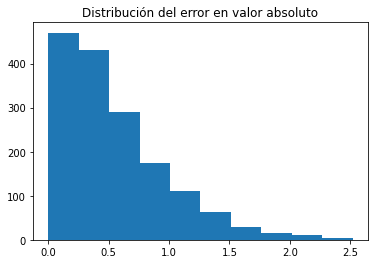

In [38]:
# Dibujamos el histograma de los errores
fig1 = plt.figure()
ax1 = plt.axes()
ax1.hist(errors)

plt.title('Distribución del error en valor absoluto')
plt.show()

### Análisis del histograma

Podemos ver en el histograma que la mayoría de valores predichos se quedan en un rango muy cercano a su clase real, es decir, si tengo un vino de clase 5, lo más seguro es que el predictor obtenga un valor que oscile entre 4 o 6. Por tanto, no acertamos del todo en las clases, pero no nos desplazamos demasiado del valor esperado, esto significa que nuestro predictor no sabrá decirnos con exactitud la clase de calidad del vino, pero si falla será en una clase arriba o abajo, un comportamiento bastante decente si lo que queremos no es exactitud sino proximidad en las clases.

Sin embargo, cabe recalcar que este histograma solo nos dice qué tal se comporta en el caso general, pero puede que actúe mejor o peor en diferentes clases, como veremos a continuación si graficamos los histogramas de cada clase.

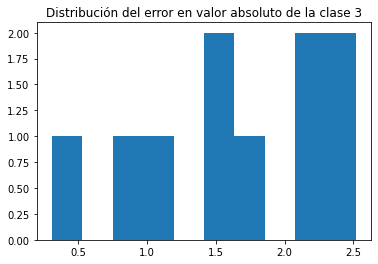

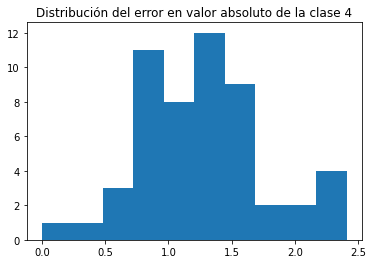

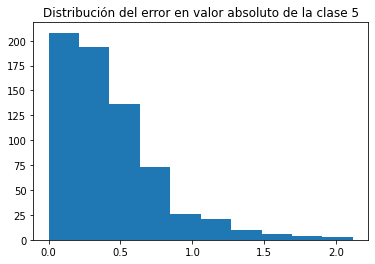

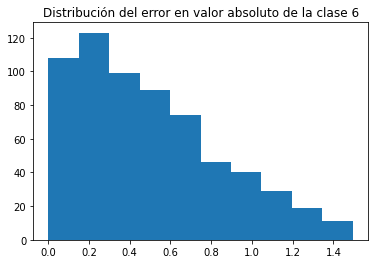

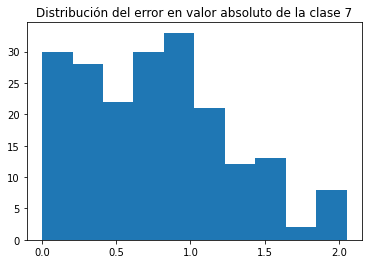

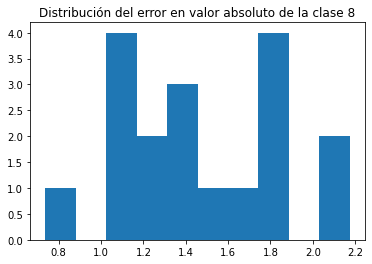

In [39]:
# Dibujamos el histograma de los errores

for i in range(3,9):
    errors_i = errors[np.argwhere(np_target.ravel() == i)]
    fig1 = plt.figure()
    ax1 = plt.axes()
    ax1.hist(errors_i)
    plt.title('Distribución del error en valor absoluto de la clase ' + str(i))
plt.show()

Como podemos observar, esta variación general no se comporta igual en cada una de las clases. 

* Las clases de calidades 3 y 8 obtienen valores predichos muy distintos, en una unidad al menos y hasta dos y media, respecto a su valor de clase objetivo.

* Con la calidad 4 pasa algo similar, aunque se acerca más sigue siendo una distribución mala y no fiable.

* La clase 7 obtiene una distribución algo mejor que las anteriores, aunque sigue siendo mejorable (está más representada y, por tanto, obtiene resultados mejores)

* Finalmente, el grueso de los datos se agrupa en las clases 5 y 6 que sí obtienenen en sus histogramas aislados datos similares a los del histograma general. Estos valores, al ser mayoritarios, dejan de lado los de las otras clases

Esta información interpretada sobre los diversos histogramas será más interpretable a continuación en la gráfica de dispersión, después de la cual analizaremos el comportamiento en cada una de ellas en profundidad y haremos una conclusión de los motivos del funcionamiento aceptable o inaceptable del sistema en las mismas.

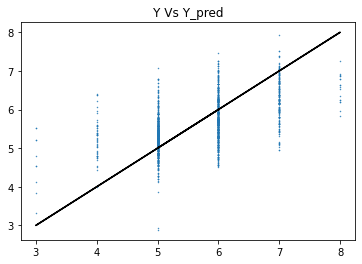

In [40]:
fig2 = plt.figure()
ax2 = plt.axes()
# dibujamos los errores: la distancia a la recta indica el nivel de error
ax2.scatter(np_target.ravel(), predicts.ravel(), s=0.2) 
# Pintamos la referencia de la predicción perfecta
ax2.plot(np_target.ravel(), np_target.ravel(), color='k') 

plt.title('Y Vs Y_pred')
plt.show()

### Análisis de la gráfica
Primero de todo, se han variado el tamaño de los puntos para poder observar mejor las concentraciones. Si no hacíamos eso, obtendríamos demasiados puntos aglomerados y sería difícil estuiar la gráfica. Esto es debido a que los valores objetivo originales no se reparten de forma continua, sino que son clases discretas de entre 3 y 8, y por tanto obtenemos unas líneas verticales que relacionan los valores de esa clase con su valor predicho.

Una vez justificada esta forma de la gráfica, observemos qué información nos da sobre las distintas clases:

* Las clases 3 y 8 apenas aparecen, ya vimos que estaban infrarrepresentadas en la muestra. Los puntos de las mismas además de ser pocos, nos dan una mala predicción, no llegando ninguna a pasar por el 3 o el 8 respectivamente. Cabe destacar de estas dos clases que al menos las de 3 parecen estar más abajo (algo más cercanas a 3) mientras que las pertenecientes a la calidad 8 sí se aproximan al valor superior 8 algo más (valores entre 5 o 6)

* La clase 4 está más representada que las otras dos, aunque no excesivamente, y por tanto nos da un resultado de predicción similar al anterior. Los valores aproximan mal, más bien cercanos al 5 (puede que no sean muy diferenciables ambas calidades según los datos dados) pero al menos al situarse entre 4, 5 y 6, no fallan demasiado en la predicción (en torno a una o dos calidades más a la hora de clasificar)

* La clase 7 es la siguiente más representada. En este caso los puntos quedan por debajo del 7, más cercanos al 6, pero suficientemente cerca (incluso algunos por encima del 7) como para decir que la aproximación de esta clase es buena, suficientemente cerca de 7 en promedio y, como mucho en 6, que sería una calidad de diferencia a la hora de clasificar.

* Finalmente analicemos las clases 5 y 6.Son las más representadas en nuestro set de datos y, por tanto, aquellas cuya predicción acierta más en promedio. Esto se observa claramente pues los puntos se agrupan mucho más cerca de la recta de predicción perfecta. Además, tiene sentido pues la media del objetivo y la de los valores predichos gira en torno a 5.62, que es un valor bastante promedio entre 5 y 6.

### Análisis del modelo y posibles mejoras

El modelo obtiene, pues, una predicción que no se aleja mucho de las calidades esperadas en promedio, pero que no acierta de forma consistente en las mismas, sobre todo en aquellas clases infrarrepresentadas. 

Por tanto, es un modelo no demasiado bueno de primeras.Si quisiéramos obtener una configuración que representara mejor las clases y no tuviera problemas, tendríamos varias opciones, tal y como hemos mencionado unos apartados atrás:

* La primera sería intentar conseguir un dataset más rico o con información más balanceada, de forma que el MLP tuviera suficientes datos de cada clase para realizar mejores inferencias. Sin embargo, no siempre es posible obtener más datos, así que es una opción que pocas veces podremos tener en cuenta si las clases no están balanceadas.

* La segunda de ellas sería trabajar con la librería 'imbalanced-learn', que aporta diversas opciones para trabajar con clases desbalanceadas. Algunas de estas involucran introducir pesos para reforzar la presencia de estas clases durante el entrenamiento.

* La última, y quizás mas interesante, sería realizar una estratificación. Consiste en qu cada vez que tomemos lotes (batch) de datos, nos encarguemos de escoger una cantidad representativa de los datos de cada clase, de forma que no queden infrarrepresentados ningunos y al final el sistema se entrene pensando que hay una cantidad balanceada de los elementos de cada clase (aunque no sea el caso).